In [2]:
pwd

'D:\\NLP\\机器学习与商业数据挖掘'

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

scikit中的make_blobs方法常被用来生成聚类算法的测试数据，直观地说，make_blobs会根据用户指定的特征数量、中心点数量、范围等来生成几类数据，这些数据可用于测试聚类算法的效果。

n_samples是待生成的样本的总数。

n_features是每个样本的特征数。

centers表示类别数。

cluster_std表示每个类别的方差。


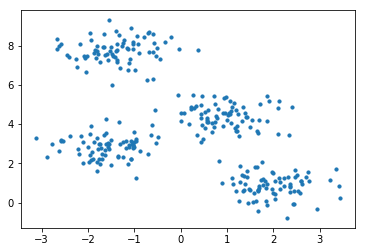

In [37]:
from sklearn.datasets.samples_generator import make_blobs   

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)  #X为样本特征,y——true为样本簇类别，共300个样本,300行2列，一共4类，centers是什么意思
plt.scatter(X[:, 0], X[:, 1], s=10);   #s表示什么， 括号是什么，0表示X第一列，1表示X第二列,s=50表示点的大小，300行2列的数据集

In [38]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4) #初始化，分成4类
kmeans.fit(X) #训练
y_kmeans = kmeans.predict(X)#给lable

In [39]:
y_kmeans  #查看y_kmeans

array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1, 2, 1, 3, 1, 0, 3, 3, 0, 2, 2, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 3, 2, 3, 3,
       2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 0, 3,
       1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 3, 2, 1, 0, 1, 0, 3, 0, 0, 3, 1, 3,
       2, 2, 0, 1, 0, 3, 1, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 3, 1, 1, 1, 3, 1, 3,
       0, 2, 1, 2, 0, 3, 1, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 0, 3, 2, 1,
       0, 0, 3, 2, 0, 3, 2, 2, 3, 3, 3, 3, 0, 1, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 1, 3, 2, 0, 2, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 2, 2, 0, 0, 3,
       1, 0, 0, 2, 0, 2, 3, 1, 1, 3, 3, 1, 3, 0, 2, 3, 0, 2, 1, 2, 0, 3,
       0, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 3, 2, 2, 2, 0, 0, 1, 3, 3, 2, 0,
       1, 2, 3, 1, 3, 0, 0, 2, 2, 3, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 2, 1, 3, 0, 0, 1, 1, 1, 0, 0, 3, 1, 2])

cmap="viridis"颜色映射colormap,翡翠色 ;
cmap="gist_rainbow"五彩缤纷; 
cmap="spring"青春; 
cmap="Reds"炽热; 
cmap="rainbow"彩虹; 
cmap="magma" 晚霞; 
cmap="autumn"橙色; 
cmap="cool" 紫色

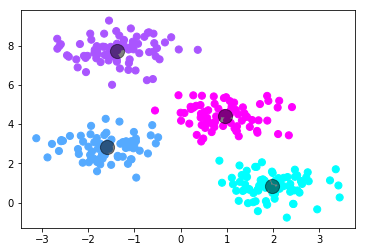

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='cool')  #c=y_kmeans用kmeans表示颜色
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);  #alpha？ 

In [5]:
centers #查看centers

array([[ 1.98258281,  0.86771314],
       [-1.58438467,  2.83081263],
       [-1.37324398,  7.75368871],
       [ 0.94973532,  4.41906906]])

求距离1——pairwise_distances_argmin()方法，返回目标最近的标签值

作用：使用欧几里得距离,返回的是X距离Y最近点的index，所以形状与X的形状一致。过程：挨个查找X列表中的点，返回该点距离最近Y点的index

In [40]:
from sklearn.metrics import pairwise_distances_argmin
import numpy as np
def find_clusters(X, n_clusters, rseed=2):  #rseed表示结果很好，如果不等于2可能收敛不好
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters] 
    centers = X[i]
    while True:
        # 2a. Assign labels based on closest center 
        labels = pairwise_distances_argmin(X, centers) #贴标签
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)]) #对llabels==i取均值
        # 2c. Check for convergence
        if np.all(centers == new_centers): 
            break
        centers = new_centers 
    return centers, labels

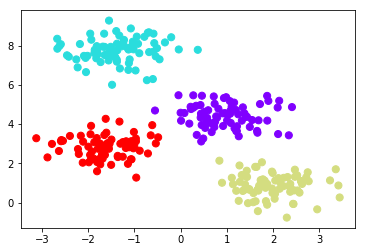

In [41]:
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='rainbow');

## Kmeans 或许收敛到local 解

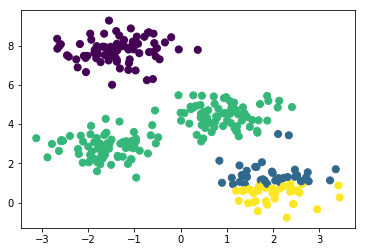

In [11]:
centers, labels = find_clusters(X, 4, rseed=0)  #把rseed设置为0
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## Kmeans 需要事先指定K

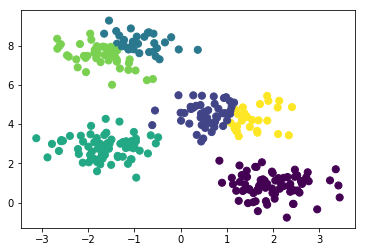

In [12]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## Kmeans 需要线性划分

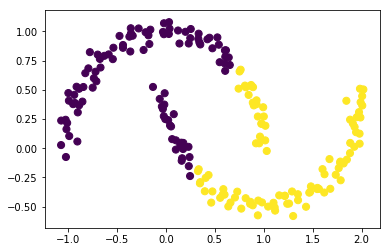

In [13]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0) #y表示label
labels = KMeans(2, random_state=0).fit_predict(X) #两步合并成一步
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## Example 1: Kmeans on digits

In [14]:
from sklearn.datasets import load_digits 
digits = load_digits()
digits.data.shape

(1797, 64)

In [15]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

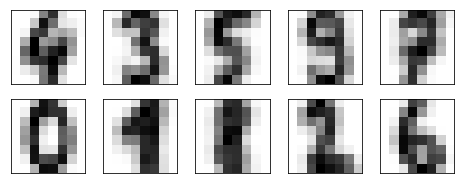

In [16]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))  #2行5列， 整个图大小8x3
centers = kmeans.cluster_centers_.reshape(10, 8, 8)   #10个8x8的数据
for axi, center in zip(ax.flat, centers):  #
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [17]:
from scipy.stats import mode
labels = np.zeros_like(clusters) 
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [18]:
from sklearn.metrics import accuracy_score 
accuracy_score(digits.target, labels)


0.7935447968836951

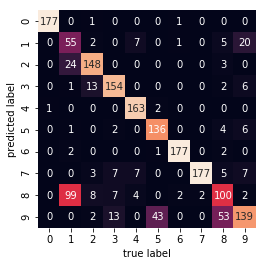

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(digits.target, labels) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [20]:
from sklearn.manifold import TSNE
# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='pca', random_state=0)
digits_proj = tsne.fit_transform(digits.data)
# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)
            # Permute the labels
labels = np.zeros_like(clusters) 
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
# Compute the accuracy
accuracy_score(digits.target, labels)

0.9398998330550918

In [21]:
from sklearn.decomposition import PCA
# Project the data: this step will take several seconds
pca = PCA(n_components=30)
digits_proj = pca.fit_transform(digits.data)
# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)
            # Permute the labels
labels = np.zeros_like(clusters) 
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
# Compute the accuracy
accuracy_score(digits.target, labels)

0.7918753478018921

## Example 2: k-means for color compression

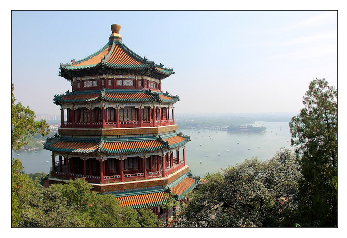

In [22]:
# Note: this requires the pillow package to be installed 
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [23]:
china.shape #高427，长640，RGB=3

(427, 640, 3)

In [24]:
data = china / 255.0 # use 0...1 scale 
data = data.reshape(427 * 640, 3)  #把数据拉直
data.shape

(273280, 3)

In [25]:
from sklearn.cluster import MiniBatchKMeans 
kmeans = MiniBatchKMeans(16) #16个颜色
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]



In [26]:
kmeans.cluster_centers_.shape

(16, 3)

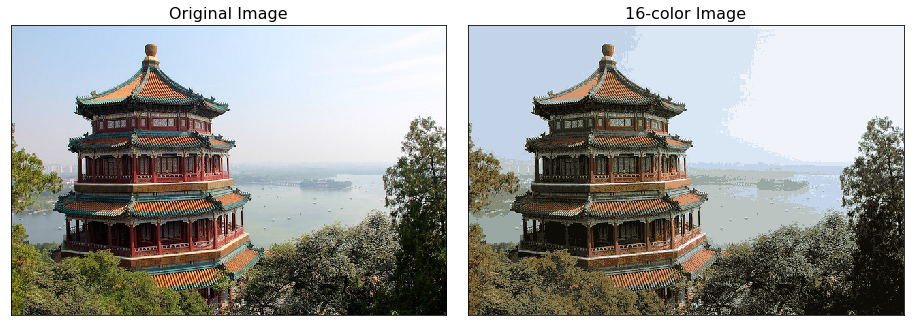

In [27]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
              subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

## K means 算法对每个cluster的协方差都看成是identity matrix

In [42]:
from sklearn.datasets.samples_generator import make_blobs 
X, y_true = make_blobs(n_samples=400, centers=4,
    cluster_std=0.60, random_state=0)

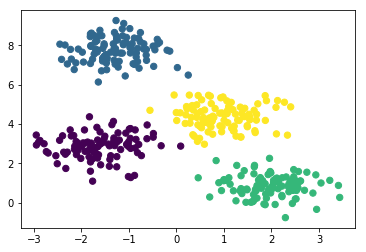

In [43]:
# Plot the data with k-means labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [44]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

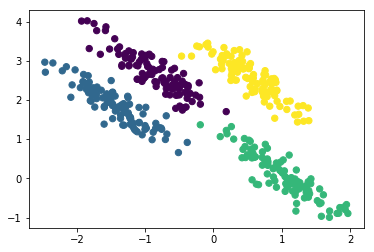

In [45]:
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=y_true, s=40, cmap='viridis');

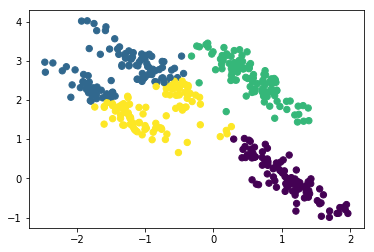

In [46]:
kmeans = KMeans(4)
labels = kmeans.fit(X_stretched).predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels, s=40, cmap='viridis');

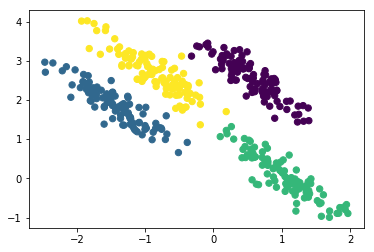

In [52]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4,n_init=10).fit(X_stretched)
labels = gmm.predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels, s=40, cmap='viridis');

## How many components? 

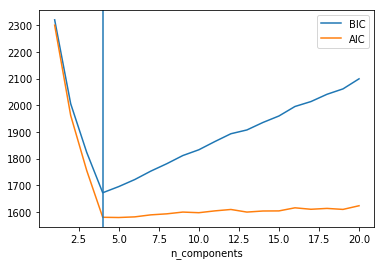

In [34]:
n_components = np.arange(1, 21)
models = [GMM(n, n_init=10).fit(X_stretched) for n in n_components]
plt.plot(n_components, [m.bic(X_stretched) for m in models], label='BIC') 
plt.plot(n_components, [m.aic(X_stretched) for m in models], label='AIC')
plt.axvline(4)
plt.legend(loc='best')
plt.xlabel('n_components');

## 层次聚类

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level',p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

AttributeError: 'AgglomerativeClustering' object has no attribute 'distances_'

In [1]:
#需要sklearn0.22,查看 sklearn，升级成最新。方法：在终端conda update scikit-learn
import sklearn
sklearn.__version__

'0.21.2'

In [3]:
import sys
sys.path

['D:\\NLP\\机器学习与商业数据挖掘',
 'C:\\ProgramData\\Anaconda3\\python37.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\Users\\Geoffrey\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Geoffrey\\.ipython']

In [2]:
pip install --upgrade sklearn

Requirement already up-to-date: sklearn in c:\programdata\anaconda3\lib\site-packages (0.0)
Note: you may need to restart the kernel to use updated packages.


Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.org', port=443): Read timed out. (read timeout=15)")': /simple/sklearn/


In [34]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [75]:
model = AgglomerativeClustering(n_clusters=3)
model=model.fit(X)

In [76]:
clusters = model.labels_

In [77]:
labels = np.zeros_like(clusters) 
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(iris.target[mask])[0]
# Compute the accuracy
accuracy_score(iris.target, labels)

0.8933333333333333

In [78]:
from sklearn import metrics
metrics.silhouette_score(X, labels, metric='euclidean')

0.5543236611296415

In [54]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [58]:
sum(model.labels_==1),sum(model.labels_==2),sum(model.labels_==0)

(50, 36, 64)

In [72]:
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import accuracy_score 

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)
            # Permute the labels
labels = np.zeros_like(clusters) 
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(iris.target[mask])[0]
# Compute the accuracy
accuracy_score(iris.target, labels)

0.8933333333333333

In [74]:
from sklearn import metrics
metrics.silhouette_score(X, labels, metric='euclidean')

0.5528190123564091

In [57]:
sum(clusters==1),sum(clusters==2),sum(clusters==0)

(50, 62, 38)

## spectral clustering

In [48]:
print(__doc__)

# Author: Gael Varoquaux <gael.varoquaux@normalesup.org>, Brian Cheung
# License: BSD 3 clause

import time

import numpy as np
from distutils.version import LooseVersion
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import skimage
from skimage.data import coins
from skimage.transform import rescale

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

# these were introduced in skimage-0.14
if LooseVersion(skimage.__version__) >= '0.14':
    rescale_params = {'anti_aliasing': False, 'multichannel': False}
else:
    rescale_params = {}

# load the coins as a numpy array
orig_coins = coins()

# Resize it to 20% of the original size to speed up the processing
# Applying a Gaussian filter for smoothing prior to down-scaling
# reduces aliasing artifacts.
smoothened_coins = gaussian_filter(orig_coins, sigma=2)
rescaled_coins = rescale(smoothened_coins, 0.2, mode="reflect",
                         **rescale_params)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(rescaled_coins)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 10
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS = 25

Automatically created module for IPython interactive environment


Spectral clustering: kmeans, 7.33s
Spectral clustering: discretize, 6.04s


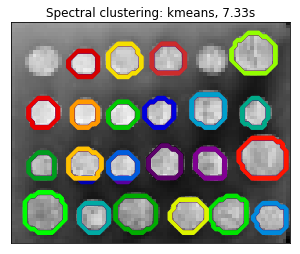

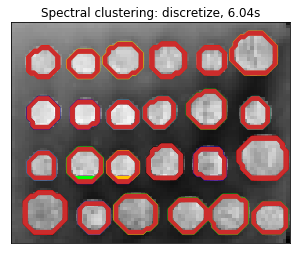

In [49]:
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=42)
    t1 = time.time()
    labels = labels.reshape(rescaled_coins.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(rescaled_coins, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l,
                    colors=[plt.cm.nipy_spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()

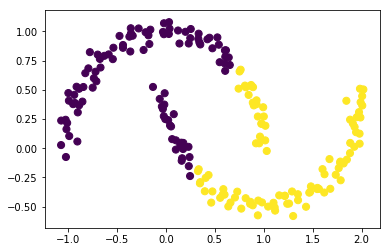

In [50]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
                           s=50, cmap='viridis');

C:\Users\Geoffrey\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


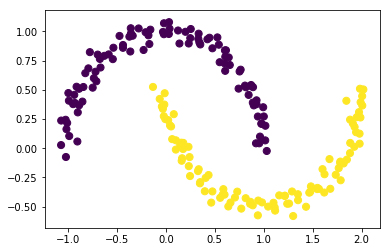

In [51]:
from sklearn.cluster import SpectralClustering 
model = SpectralClustering(n_clusters=2,
                           affinity='nearest_neighbors',
                           assign_labels='discretize')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
